In [1]:
### Sourya Dey, USC
### Comparing different sparsity methods
### Uses Pytorch
### Multiplication time is used as metric

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
## CPU ##
sizes = [64,256,1024]
times = {}

for size in sizes:
    densemat = torch.randn(size,size)
    nnzrows = [size//64,size//16,size//4]
    for nnzrow in nnzrows:
        nnz = int(size*nnzrow)
        elems = np.random.randn(nnz)
        
        ## Case 1: Structured sparsity
        with open('./readymade_adjmats/adjmat_size{0}x{0}_nnzrow{1}.npy'.format(size,nnzrow), 'rb') as f:
            adj = np.load(f)
        adjf = adj.flatten()
        adjf[np.where(adjf==1)[0]] = elems
        spmat = torch.from_numpy(adjf.reshape(adj.shape)).float()
        print('size{0}x{0}_nnzrow{1}'.format(size,nnzrow))
        time = %timeit -o torch.mm(spmat,densemat)
        times['size{0}x{0}_nnzrow{1}'.format(size,nnzrow)] = [np.mean(time.timings)*(10**6)]
        
        ## Case 2: Random sparsity
        locs = np.random.choice(size*size,nnz, replace=False)
        spmat = np.zeros(size*size)
        spmat[locs] = elems
        spmat = torch.from_numpy(spmat.reshape(size,size)).float()
        print('size{0}x{0}_nnzrow{1}'.format(size,nnzrow))
        time = %timeit -o torch.mm(spmat,densemat)
        times['size{0}x{0}_nnzrow{1}'.format(size,nnzrow)].append(np.mean(time.timings)*(10**6))
        
        ## Case 3: Maximally unstructured sparsity
        spmat = np.zeros(size*size)
        spmat[:nnz] = elems
        spmat = torch.from_numpy(spmat.reshape(size,size)).float()
        print('size{0}x{0}_nnzrow{1}'.format(size,nnzrow))
        time = %timeit -o torch.mm(spmat,densemat)
        times['size{0}x{0}_nnzrow{1}'.format(size,nnzrow)].append(np.mean(time.timings)*(10**6))

size64x64_nnzrow1
8.39 µs ± 83.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size64x64_nnzrow1
8.32 µs ± 52.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size64x64_nnzrow1
8.29 µs ± 38.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size64x64_nnzrow4
8.37 µs ± 62.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size64x64_nnzrow4
8.23 µs ± 68.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size64x64_nnzrow4
8.29 µs ± 89.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size64x64_nnzrow16
8.82 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size64x64_nnzrow16
9.17 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size64x64_nnzrow16
9.19 µs ± 100 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size256x256_nnzrow4
172 µs ± 4.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
size256x256_nnzrow4
174 µs ± 7.78 µs per loop (mean ± std. dev. of 7 r

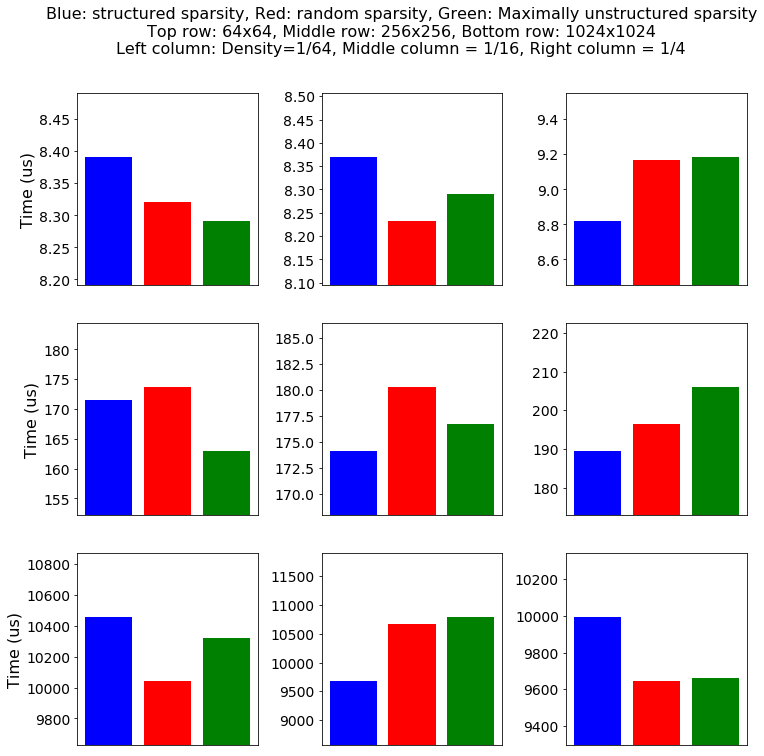

In [33]:
## CPU plots ##
plt.figure(figsize=(12,12))
plt.suptitle('Blue: structured sparsity, Red: random sparsity, Green: Maximally unstructured sparsity\nTop row: 64x64, Middle row: 256x256, Bottom row: 1024x1024\nLeft column: Density=1/64, Middle column = 1/16, Right column = 1/4', fontsize=16)
plt.subplots_adjust(wspace = 0.35)
titles = list(times.keys())

for index in range(9):
    plt.subplot(3,3,index+1)
    vals = times[titles[index]]
    plt.bar(range(3), vals, color=['b','r','g'])
    plt.xticks([])
    rng = max(vals)-min(vals)
    plt.ylim(min(vals)-rng, max(vals)+rng)
    plt.yticks(fontsize=14)
    if index%3==0:
        plt.ylabel('Time (us)', fontsize=16)
        
plt.savefig('./sparsity_comparisons_cpu.png', pad_inches=0)


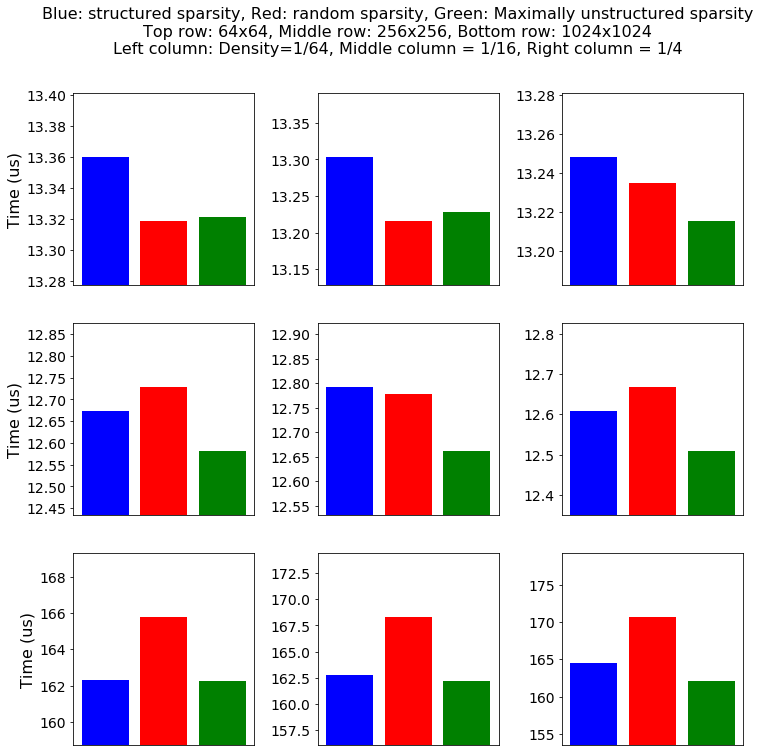

In [6]:
## GPU plots ##
import pickle
with open('./times_gpu.pkl','rb') as f:
    times = pickle.load(f)
times['size64x64_nnzrow1'][0] = 13.36 #since this value didn't come out properly

plt.figure(figsize=(12,12))
plt.suptitle('Blue: structured sparsity, Red: random sparsity, Green: Maximally unstructured sparsity\nTop row: 64x64, Middle row: 256x256, Bottom row: 1024x1024\nLeft column: Density=1/64, Middle column = 1/16, Right column = 1/4', fontsize=16)
plt.subplots_adjust(wspace = 0.35)
titles = list(times.keys())

for index in range(9):
    plt.subplot(3,3,index+1)
    vals = times[titles[index]]
    plt.bar(range(3), vals, color=['b','r','g'])
    plt.xticks([])
    rng = max(vals)-min(vals)
    plt.ylim(min(vals)-rng, max(vals)+rng)
    plt.yticks(fontsize=14)
    if index%3==0:
        plt.ylabel('Time (us)', fontsize=16)
        
plt.savefig('./sparsity_comparisons_gpu.png', pad_inches=0)
